In [1]:
import brainsss
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm
import random
from scipy.stats import sem
import time
import h5py
import ants
import nibabel as nib

import matplotlib
from scipy.ndimage import gaussian_filter1d

/home/users/yandanw/.local/lib/python3.6/site-packages/ants/viz/render_surface_function.py:16: UserWarning:

Cant import Plotly. Install it `pip install chart_studio` if you want to use ants.render_surface_function



In [2]:
from scipy.interpolate import interp1d as interp1d

In [14]:
func_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_262/func_0/'

In [15]:
#################
### Supervox ###
#################
n_clusters = 2000
cluster_dir = os.path.join(func_path, 'clustering')

load_file = os.path.join(cluster_dir, 'cluster_labels.npy')
cluster_labels = np.load(load_file)

load_file = os.path.join(cluster_dir, 'cluster_signals.npy')
all_signals = np.load(load_file)
print(all_signals.shape)
all_signals.shape

timestamps = brainsss.load_timestamps(os.path.join(func_path, 'imaging'))

fixed = brainsss.load_fda_meanbrain()

atlas = brainsss.load_roi_atlas()

explosion_rois = brainsss.load_explosion_groups()
all_rois = brainsss.unnest_roi_groups(explosion_rois)
roi_masks = brainsss.make_single_roi_masks(all_rois, atlas)
roi_contours = brainsss.make_single_roi_contours(roi_masks, atlas)

(49, 2000, 3384)
Trying to load timestamp data from hdf5 file.
Success.


In [6]:
fly_path='/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_261/'

analysis_dir = os.path.join(fly_path,"analysis")
navi_sub_dir = "20230517_warp_away.npy"

fly_261_away_warp = os.path.join(analysis_dir, navi_sub_dir)

fly_261_away_warp = np.load(fly_261_away_warp)

np.shape(fly_261_away_warp)

(68, 314, 146, 91)

In [8]:
away_flies = np.concatenate((fly_301_away_warp,fly_299_away_warp, fly_261_away_warp,fly_262_away_warp), axis = 0)

In [7]:
65+51+96+68

280

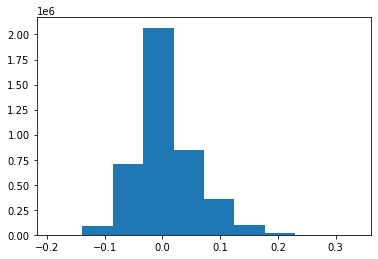

In [10]:
plt.hist(np.mean(away_flies,axis=0).flatten());

In [16]:
input_canvas = np.zeros((500,500,3)) #+.5 #.5 for diverging
data_to_plot = np.mean(away_flies,axis =0)[:,:,::-1]
vmax = .24
explosion_map = brainsss.place_roi_groups_on_canvas(explosion_rois,
                                                            roi_masks,
                                                            roi_contours,
                                                            data_to_plot,
                                                            input_canvas,
                                                            vmax=vmax,
                                                            cmap='seismic',
                                                            diverging=True)#'hot')

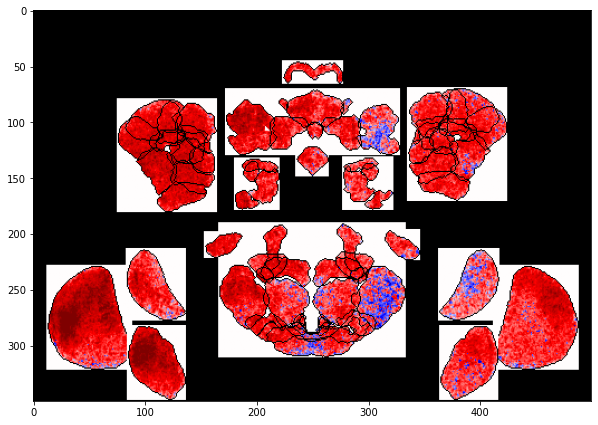

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(explosion_map[150:,:])

In [21]:
fly_path='/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_301/'

analysis_dir = os.path.join(fly_path,"analysis")
navi_sub_dir = "20230517_warp_meno.npy"

fly_301_meno_warp = os.path.join(analysis_dir, navi_sub_dir)

fly_301_meno_warp = np.load(fly_301_meno_warp)

np.shape(fly_301_meno_warp)

(31, 314, 146, 91)

In [22]:
189+42+28+31

290

In [23]:
meno_flies = np.concatenate((fly_301_meno_warp,fly_299_meno_warp, fly_261_meno_warp,fly_262_meno_warp), axis = 0)

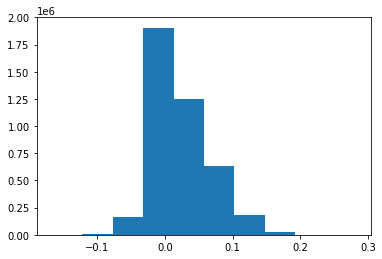

In [25]:
plt.hist(np.mean(meno_flies,axis=0).flatten());

In [26]:
input_canvas = np.zeros((500,500,3)) #+.5 #.5 for diverging
data_to_plot = np.mean(meno_flies,axis =0)[:,:,::-1]
vmax = .2
explosion_map = brainsss.place_roi_groups_on_canvas(explosion_rois,
                                                            roi_masks,
                                                            roi_contours,
                                                            data_to_plot,
                                                            input_canvas,
                                                            vmax=vmax,
                                                            cmap='seismic',
                                                            diverging=True)#'hot')

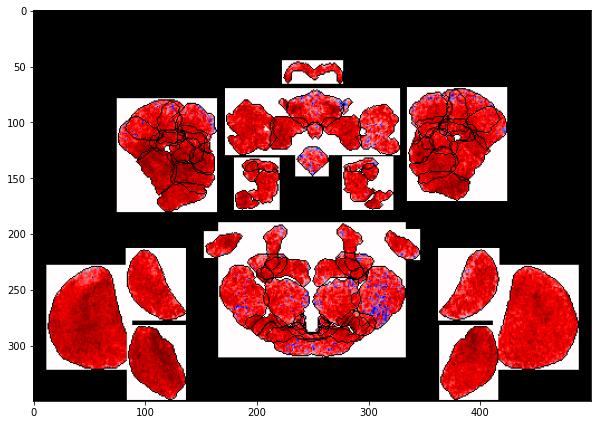

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(explosion_map[150:,:])